In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB as GB, MultinomialNB as MB
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
salary_train= pd.read_csv("SalaryData_Train.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [5]:
salary_test= pd.read_csv("SalaryData_Test.csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [10]:
Train=salary_train.drop_duplicates()

In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [12]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [14]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [16]:
Test= salary_test.drop_duplicates()
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# **Visualizations**

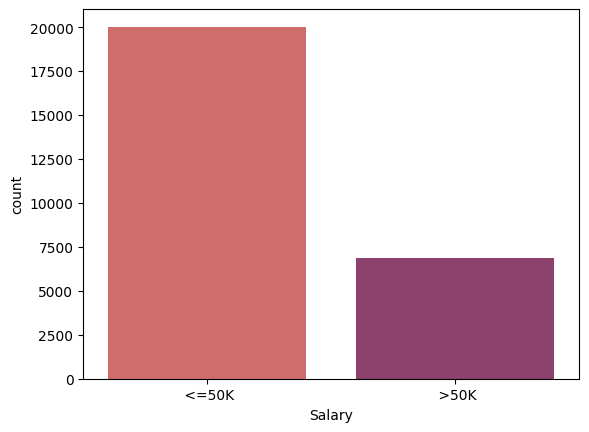

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [37]:
sns.countplot(x='Salary',data= Train, palette='flare')
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

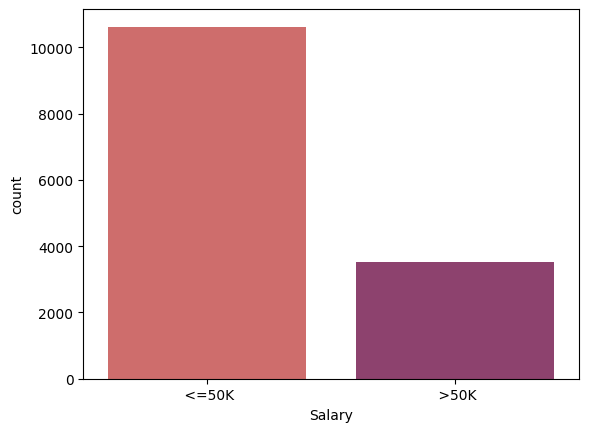

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [39]:
sns.countplot(x='Salary',data= Test,palette='flare')
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

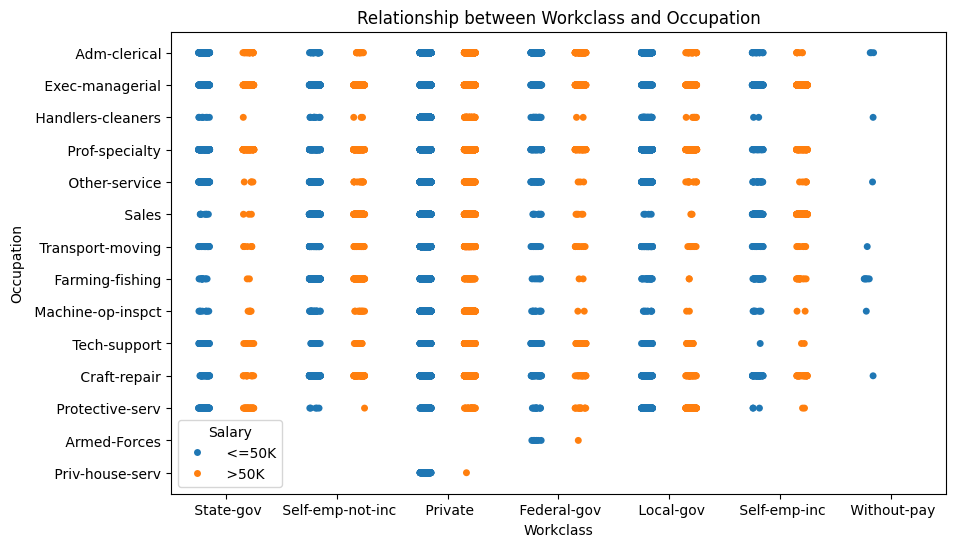

In [48]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='workclass', y='occupation', hue='Salary', data=salary_train, jitter=True, dodge=True)
plt.title('Relationship between Workclass and Occupation')
plt.xlabel('Workclass')
plt.ylabel('Occupation')
plt.legend(title='Salary')
plt.show()

<Axes: xlabel='education'>

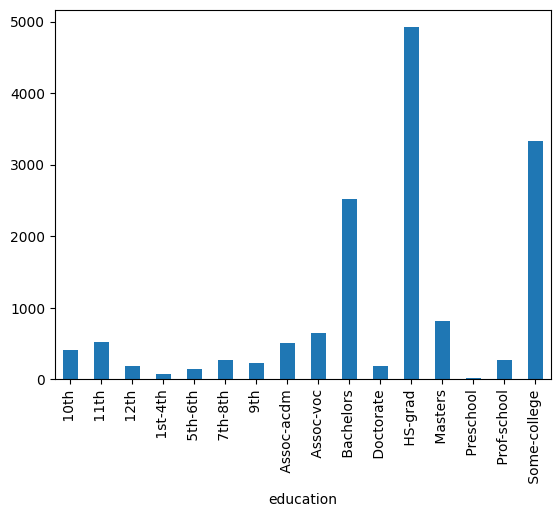

In [45]:
pd.crosstab(salary_train['Salary'],salary_train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

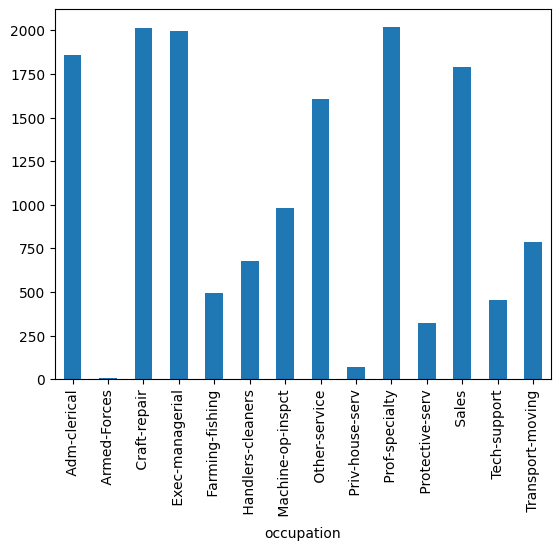

In [46]:
pd.crosstab(salary_train['Salary'],salary_train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

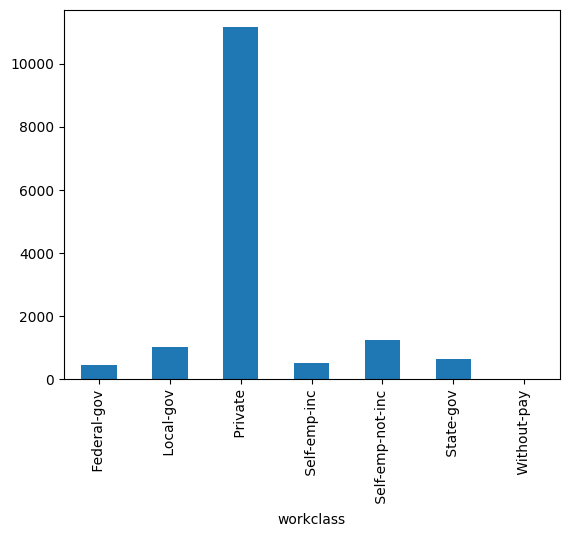

In [49]:
pd.crosstab(salary_train['Salary'],salary_train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

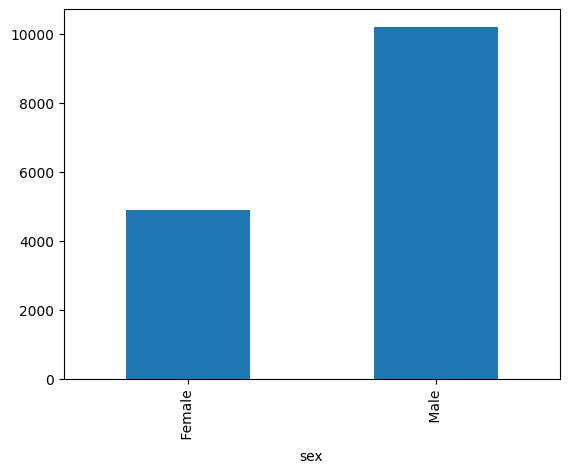

In [50]:
pd.crosstab(salary_train['Salary'],salary_train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

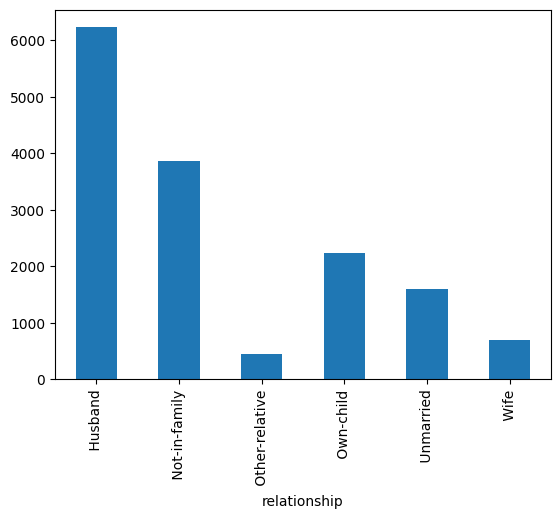

In [51]:
pd.crosstab(salary_train['Salary'],salary_train['relationship']).mean().plot(kind='bar')

In [17]:
Columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [18]:
number = LabelEncoder()
for i in Columns:
  Train[i]= number.fit_transform(Train[i])
  Test[i]= number.fit_transform(Test[i])


In [19]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [20]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [21]:
colnames= Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
x_train= Train[colnames[0:13]].values
y_train= Train[colnames[13]].values
x_test= Test[colnames[0:13]].values
y_test= Test[colnames[13]].values

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# **Applying Navie Bayes**

In [25]:
model= MB()
train_pred= model.fit(x_train,y_train).predict(x_train)
test_pred= model.fit(x_train,y_train).predict(x_test)

In [26]:
acc_train_pred= np.mean(train_pred==y_train)
acc_train_pred

0.7442664386871353

In [27]:
acc_test_pred= np.mean(test_pred==y_test)
acc_test_pred

0.7515923566878981

In [28]:
confusion_matrix= confusion_matrix(y_test,test_pred)
confusion_matrix

array([[10620,     0],
       [ 3510,     0]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.7515923566878981

In [30]:
G_model= GB()
train_pred_gau= G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau= G_model.fit(x_train,y_train).predict(x_test)

In [31]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.7933687692822362

In [32]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.7951875442321302

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [34]:
confusion_matrix

array([[10056,   564],
       [ 2330,  1180]])

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7951875442321302
